In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('country',axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:])
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


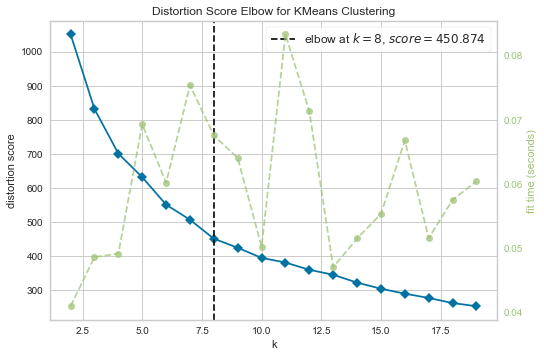

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(df_scaled)
elbow.show()

In [7]:
elbow.elbow_value_

8

In [8]:
kmeans = KMeans(n_clusters= elbow.elbow_value_)
km = kmeans.fit(df_scaled)

In [9]:
cluster = km.labels_

In [10]:
cluster



array([3, 6, 2, 3, 6, 2, 2, 0, 0, 2, 6, 6, 2, 6, 6, 0, 6, 3, 6, 2, 6, 1,
       2, 5, 6, 3, 1, 6, 3, 0, 2, 3, 3, 6, 2, 2, 3, 3, 3, 6, 3, 6, 6, 6,
       0, 2, 2, 2, 2, 3, 3, 6, 6, 0, 0, 3, 3, 6, 0, 3, 0, 2, 2, 3, 1, 6,
       1, 6, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 6, 2, 3, 1, 5, 6, 3, 6, 6, 1,
       1, 2, 6, 7, 6, 3, 3, 6, 6, 3, 7, 3, 6, 1, 6, 2, 6, 2, 3, 2, 1, 2,
       0, 0, 3, 4, 0, 5, 3, 6, 6, 2, 2, 6, 0, 5, 2, 2, 1, 2, 5, 3, 6, 6,
       1, 7, 6, 6, 1, 1, 6, 0, 2, 2, 3, 2, 0, 0, 2, 3, 6, 3, 1, 2, 6, 2,
       2, 3, 6, 5, 0, 0, 2, 2, 2, 2, 6, 3, 3])

In [11]:
centers = km.cluster_centers_

In [12]:
centers

array([[-8.44966266e-01, -1.38508536e-02,  1.35024763e+00,
        -3.58055690e-01,  1.20292473e+00, -6.11719771e-01,
         1.16569211e+00, -7.53387851e-01,  1.77594870e+00],
       [ 1.20039914e+00, -5.30048188e-01,  1.14266784e+00,
         5.31303504e-01, -7.02018222e-01, -1.80659818e-01,
        -1.60298003e+00,  7.98781395e-01, -5.96684208e-01],
       [-2.56753557e-01, -4.20357826e-01, -5.22118638e-01,
        -5.19142593e-01, -3.48386712e-01,  2.48737532e-01,
         1.51092241e-01, -2.51962878e-01, -4.26628955e-01],
       [ 1.35355832e+00, -3.89303115e-01, -6.04353285e-01,
        -3.55894116e-01, -7.00548137e-01,  3.33090224e-01,
        -1.14813337e+00,  1.55092493e+00, -6.11893144e-01],
       [ 2.28138502e+00, -5.78451631e-01, -6.37438082e-01,
        -1.22178479e+00, -6.24064774e-01,  9.12971806e+00,
        -1.13412081e+00,  1.91613337e+00, -5.81936274e-01],
       [-6.76981113e-01,  8.70515368e-01, -1.39329844e+00,
        -4.23563403e-01,  2.82888846e+00,  5.296040

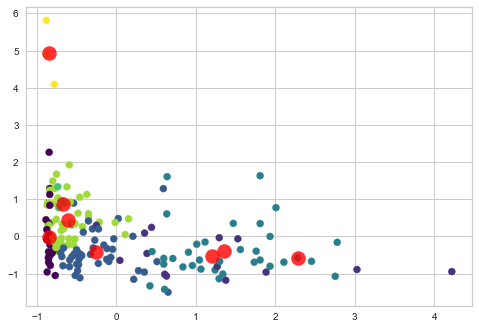

In [13]:
plt.scatter(df_scaled.iloc[:, 0],
            df_scaled.iloc[:, 1],
            c=cluster,
            s=50,
            cmap="viridis")

plt.scatter(centers[:, 0],
            centers[:, 1],
            c="red",
            s=200,
            alpha=0.8)
plt.show()

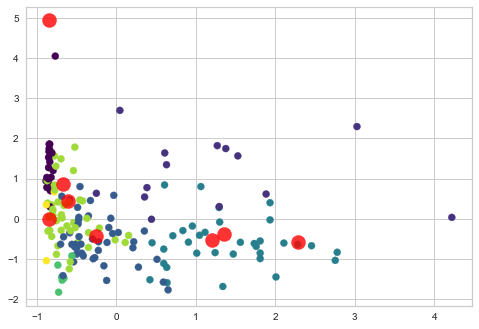

In [14]:
plt.scatter(df_scaled.iloc[:, 0],
            df_scaled.iloc[:, 2],
            c=cluster,
            s=50,
            cmap="viridis")

plt.scatter(centers[:, 0],
            centers[:, 1],
            c="red",
            s=200,
            alpha=0.8)
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_scaled, cluster)
score

0.2411100828699741